# Sampling Bivariate Gaussian Distribution

Let's look at the bivariate normal distribution for random variables $X \sim \mathcal{N}(\mu_X, \sigma_X^2) $ and $ Y \sim \mathcal{N}(\mu_Y, \sigma_Y^2)$:


\begin{equation*}
\begin{bmatrix} X \\ Y \end{bmatrix} \sim \mathcal{N} \Bigg( \begin{bmatrix} \mu_X \\ \mu_Y \end{bmatrix}, \begin{bmatrix} \sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{bmatrix} \Bigg).
\end{equation*}

We will examine here the effect of the covariance matrix $\boldsymbol{\Sigma}$ when it's:
- <b>Full</b> so all the matrix entries are populated
- <b>Diagonal</b> so all the non-diagonals are zero, i.e. $\text{diag}(\sigma_X^2, \sigma_Y^2)$
- <b>Isotropic/Spherical</b> same as diagonal but now all the diagonals have fixed variance $\sigma^2$, i.e. $\text{diag}(\sigma^2, \sigma^2)$ or $\boldsymbol{\Sigma} = \sigma^2 \mathbf{I}$

First import the necessary modules for this notebook:

In [1]:
# Widget to manipulate plots in Jupyter notebooks
%matplotlib widget 

import matplotlib.pyplot as plt # For general plotting
from matplotlib import cm

import numpy as np

from scipy.stats import multivariate_normal # MVN not univariate

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

# Number of samples to draw from each distribution
N = 1000

Let's now define examples of the three different kinds of covariance matrices listed above:

\begin{equation*}
\boldsymbol{\Sigma}_\text{full} = \begin{bmatrix} 1 & -1.5 \\ -1.5 & 3 \end{bmatrix}, 
\; \; \;
\boldsymbol{\Sigma}_\text{diag} = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix},
\; \; \;
\boldsymbol{\Sigma}_\text{iso} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix},
\end{equation*}

as well as a zero-mean vector $\boldsymbol{\mu} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

In [2]:
zero_mu = np.array([0, 0])

# Negative correlation
# full_sigma = np.array([[1, -1.5],
#                        [-1.5, 3]])
# Positive correlation
full_sigma = np.array([[1, 1.5],
                       [1.5, 3]])
diag_sigma = np.array([[1, 0],
                       [0, 3]])
iso_sigma = np.array([[1, 0],
                      [0, 1]])

And define the corresponding multivariate normal distributions:

In [3]:
# Generating a meshgrid for RV samples
# Create a rectangular grid out of an array of x values and an array of y values
# Need every combination of the x and y points
x = np.linspace(-4, 4, num=N)
y = np.linspace(-4, 4, num=N)
# Each X and Y are coordinate matrices of shape (N, N)
# meshgrid is very useful to evaluate functions on a grid
X, Y = np.meshgrid(x, y)

# Stack RV inputs into a random vector (N, N, 2)
# Stack arrays in sequence depth wise (along third axis).
pos = np.dstack((X, Y))

# Generating Gaussian bivariate PDFs for different sigma types
# Most important is that the last axis of .pdf denotes the no. of Gaussian dimensions (in this case 2)
full_pdf = multivariate_normal.pdf(pos, cov=full_sigma, mean=zero_mu)
diag_pdf = multivariate_normal.pdf(pos, cov=diag_sigma, mean=zero_mu)
iso_pdf = multivariate_normal.pdf(pos, cov=iso_sigma, mean=zero_mu)

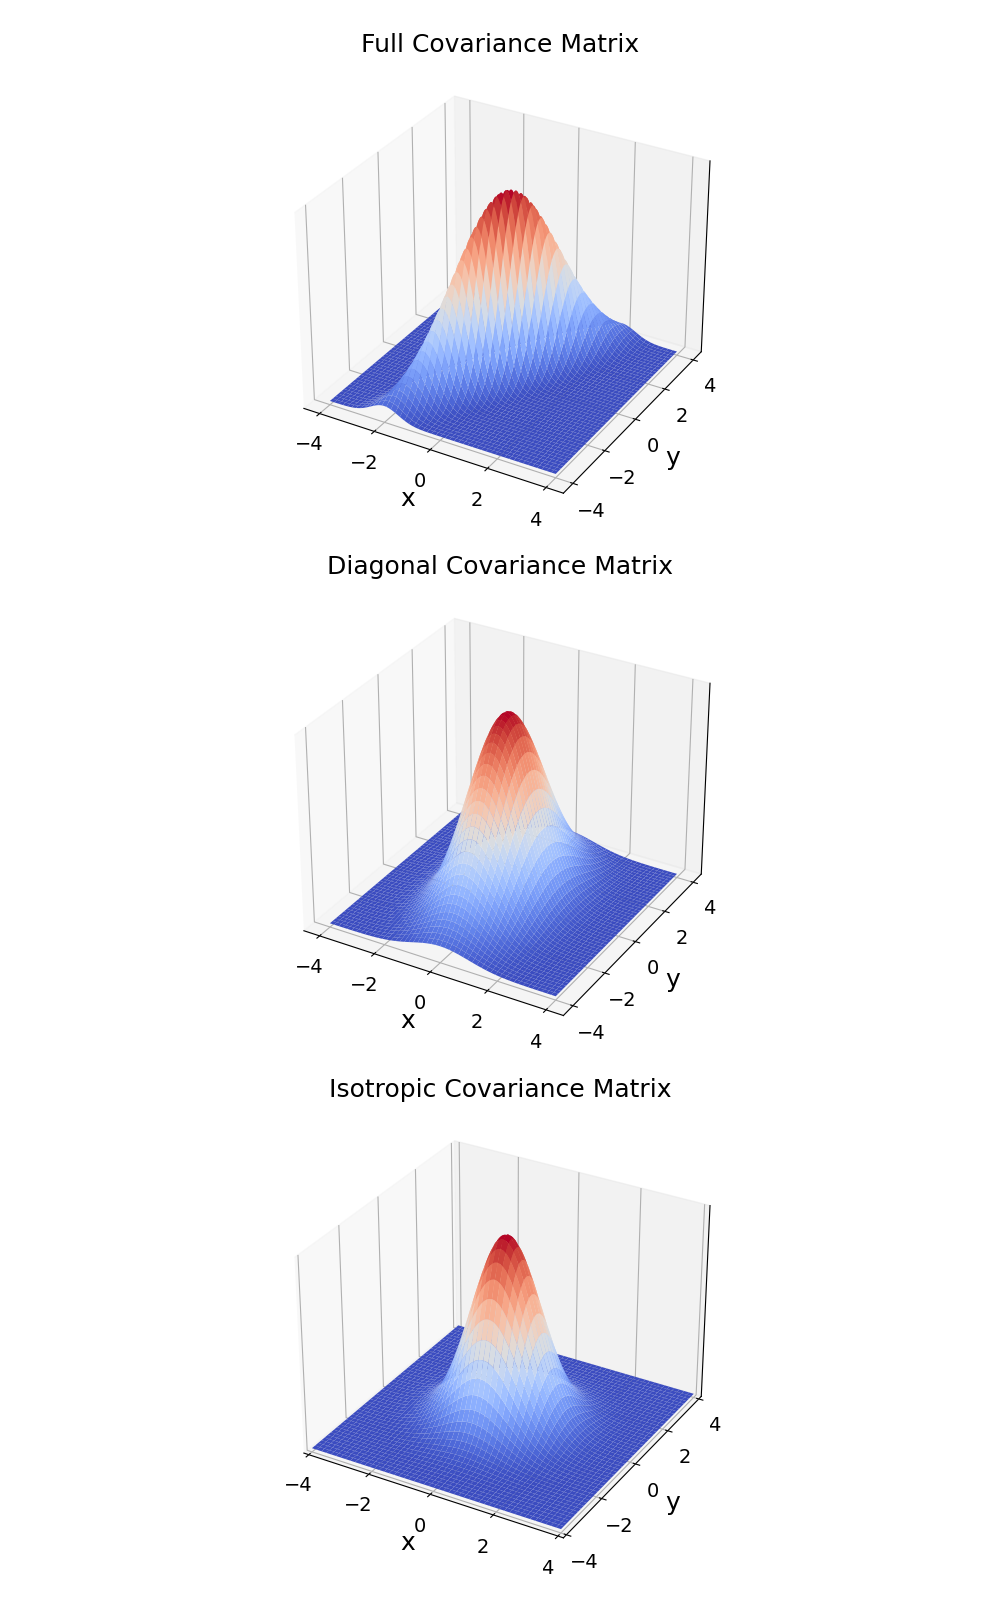

In [4]:
# Plotting as equal level contours p(x) = c, with level sets as p(x) <= c
fig = plt.figure(figsize=(10, 16))
ax1 = fig.add_subplot(311, projection = '3d')
ax1.plot_surface(X, Y, full_pdf, cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Full Covariance Matrix")
ax1.axes.zaxis.set_ticks([])

ax2 = fig.add_subplot(312, projection = '3d')
ax2.plot_surface(X, Y, diag_pdf, cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Diagonal Covariance Matrix")
ax2.axes.zaxis.set_ticks([])

ax3 = fig.add_subplot(313, projection = '3d')
ax3.plot_surface(X, Y, iso_pdf, cmap=cm.coolwarm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Isotropic Covariance Matrix")
ax3.axes.zaxis.set_ticks([])

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.tight_layout()

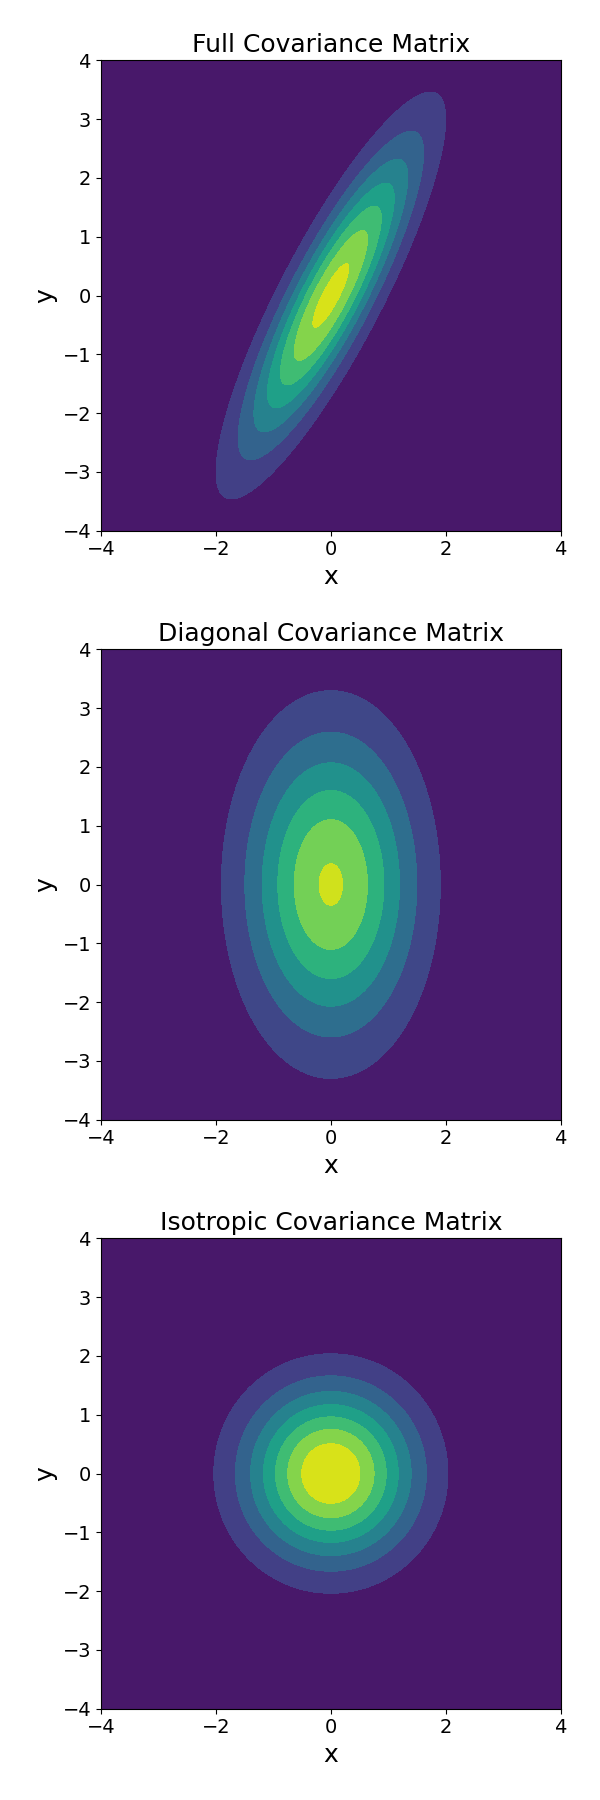

In [5]:
fig = plt.figure(figsize=(6, 18));
ax1 = fig.add_subplot(311)
ax1.contourf(x, y, full_pdf)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Full Covariance Matrix")

ax2 = fig.add_subplot(312)
ax2.contourf(x, y, diag_pdf)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Diagonal Covariance Matrix")

ax3 = fig.add_subplot(313)
ax3.contourf(x, y, iso_pdf)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Isotropic Covariance Matrix")

plt.tight_layout()
plt.show()

From the contour plots of the covariance matrices above, we can see that:

- Full have <i>elliptical</i> contours
- Diagonal have <i>axis-aligned</i> ellipticals
- Isotropic have circular contours, hence why they also go by <i>spherical</i>

If we were to do parameter estimation of the multivariate normal data distribution (e.g. using [maximum likelihood estimation](../linear_regression/lin_reg_mle.ipynb)), then a <b>full</b> covariance matrix consists of $\frac{n (n + 1)}{2}$ parameters to estimate (main diagonal plus off-diagonal entries, halved as matrix is symmetric), a <b>diagonal</b> covariance has $n$ parameters for the main diagonal, and lastly an <b>isotropic</b> matrix would only have 1 parameter, the fixed variance $\sigma^2$.